Import necessary files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import csv file from Kaggle

In [2]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
print(data['Sleep Disorder'].unique())

[nan 'Sleep Apnea' 'Insomnia']


Drop unnecessary rows

In [6]:
# drop person ID
data = data.drop(columns=['Person ID'])

Ensure data is in correct format

In [7]:
# data type of each column
data.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [8]:
# change NaN to None
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')
print(data['Sleep Disorder'].unique())

['None' 'Sleep Apnea' 'Insomnia']


In [9]:
# print out column names
print(data.columns)

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')


In [14]:
# for each column, print out the unique values
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

Gender: ['Male' 'Female']
Age: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Sleep Duration: [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep: [6 4 7 5 8 9]
Physical Activity Level: [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level: [6 8 7 4 3 5]
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Heart Rate: [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps: [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  550

In [16]:
# for column for BMI, change normal weight to normal
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')

In [17]:
# save as csv file
data.to_csv('cleaned_sleep_data.csv', index=False)

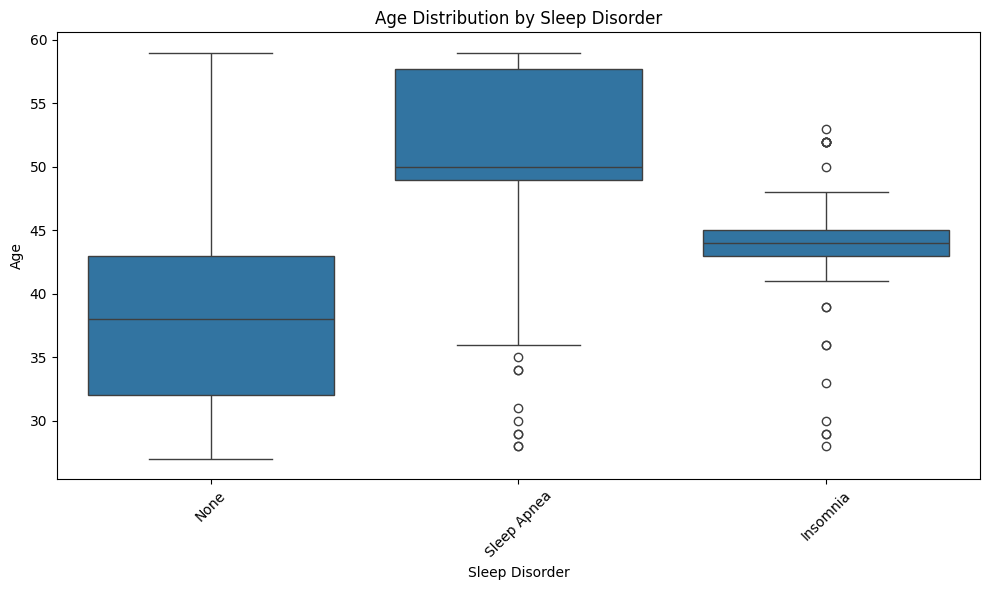

In [10]:
# plot relationship between sleep disorder and age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Age', data=data)
plt.title('Age Distribution by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('age_distribution_by_sleep_disorder.png')
plt.show()

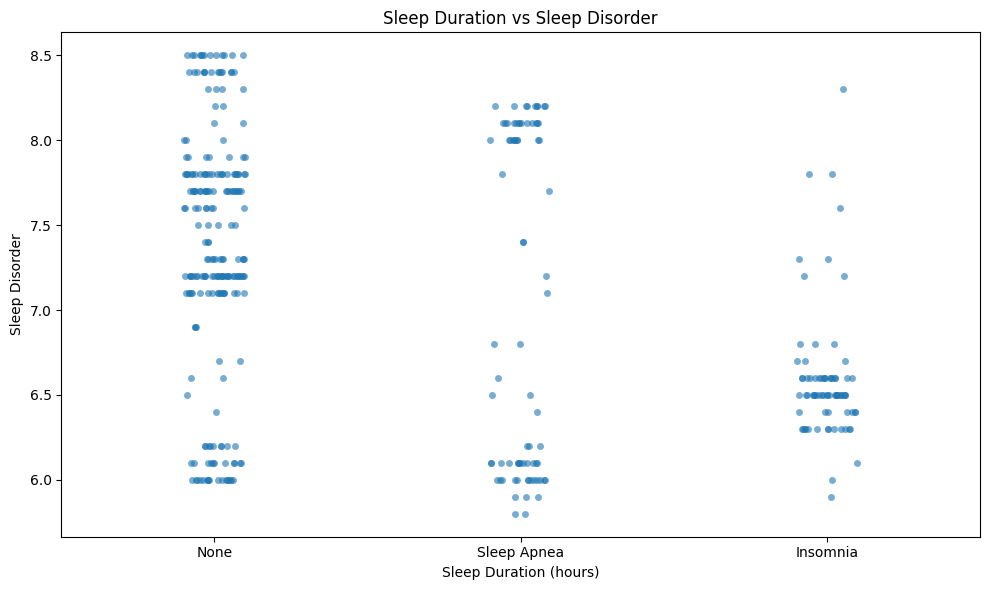

In [11]:
# plot scatter plot of hours of sleep vs sleep disorder
plt.figure(figsize=(10, 6))
sns.stripplot(x='Sleep Disorder', y='Sleep Duration', data=data, alpha=0.6, jitter=True)
plt.title('Sleep Duration vs Sleep Disorder')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Sleep Disorder')
plt.tight_layout()
plt.savefig('sleep_duration_vs_sleep_disorder.png')
plt.show()

In [ ]:
# gender vs sleep disorder


Predictive Modelling

Logistic Regression - Predictive Importance

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [4]:
data = pd.read_csv('cleaned_sleep_data.csv')
df = pd.DataFrame(data)

In [5]:
print(data)

     Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0      Male   27     Software Engineer             6.1                 6   
1      Male   28                Doctor             6.2                 6   
2      Male   28                Doctor             6.2                 6   
3      Male   28  Sales Representative             5.9                 4   
4      Male   28  Sales Representative             5.9                 4   
..      ...  ...                   ...             ...               ...   
369  Female   59                 Nurse             8.1                 9   
370  Female   59                 Nurse             8.0                 9   
371  Female   59                 Nurse             8.1                 9   
372  Female   59                 Nurse             8.1                 9   
373  Female   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0            

Counted diastolic of 80 as normal/elevated to reduce the number of unknowns

In [15]:
# make blood pressure low normal and high
# normal -> less than 120/80
# elevated -> 120-129/less than 80
#stage 1 hypertension -> 130-139/80-89
#stage 2 hypertension -> 140+/90+
def categorize_blood_pressure(row):
    systolic = int(row['Blood Pressure'].split('/')[0])
    diastolic = int(row['Blood Pressure'].split('/')[1])
    if systolic < 120 and diastolic <= 80:
        return 'Healthy'
    elif 120 <= systolic < 130 and diastolic <= 80:
        return 'Elevated'
    elif 130 <= systolic < 140 and 80 <= diastolic < 90:
        return 'Stage 1 Hypertension'
    elif systolic >= 140 and diastolic >= 90:
        return 'Stage 2 Hypertension'
    else:
        return 'Unknown'


In [16]:
# apply function to blood pressure column
df['Blood Pressure Category'] = df.apply(categorize_blood_pressure, axis=1)
print(df['Blood Pressure Category'].unique())
print(df['Blood Pressure Category'].value_counts)

['Unknown' 'Elevated' 'Stage 2 Hypertension' 'Stage 1 Hypertension'
 'Healthy']
<bound method IndexOpsMixin.value_counts of 0                   Unknown
1                  Elevated
2                  Elevated
3      Stage 2 Hypertension
4      Stage 2 Hypertension
               ...         
369    Stage 2 Hypertension
370    Stage 2 Hypertension
371    Stage 2 Hypertension
372    Stage 2 Hypertension
373    Stage 2 Hypertension
Name: Blood Pressure Category, Length: 374, dtype: object>


In [17]:
# number of each blood pressure category
df['Blood Pressure Category'].value_counts()

Blood Pressure Category
Elevated                112
Stage 1 Hypertension    108
Stage 2 Hypertension     71
Unknown                  42
Healthy                  41
Name: count, dtype: int64

In [ ]:
# categorical columns for one hot encoding
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure Category']
numerical_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

In [26]:
# One hot encoding for categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

df_final = pd.concat([df[numerical_columns], encoded_df], axis=1)

In [29]:
df_final

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Female,Gender_Male,Occupation_Accountant,...,BMI Category_Obese,BMI Category_Overweight,Blood Pressure Category_Elevated,Blood Pressure Category_Healthy,Blood Pressure Category_Stage 1 Hypertension,Blood Pressure Category_Stage 2 Hypertension,Blood Pressure Category_Unknown,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_nan
0,27,6.1,6,42,6,77,4200,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,28,6.2,6,60,8,75,10000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28,6.2,6,60,8,75,10000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28,5.9,4,30,8,85,3000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,5.9,4,30,8,85,3000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
370,59,8.0,9,75,3,68,7000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
371,59,8.1,9,75,3,68,7000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
372,59,8.1,9,75,3,68,7000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
X = df_final.drop('Sleep Disorder', axis=1)
y = df_final['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['Sleep Disorder'] not found in axis"

XGBoost